### Donors Choose Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('train_data.csv')
resource = pd.read_csv('resources.csv')

In [3]:
print(resource.columns)
print("*"* 10)
print(data.columns)
print("Number of data points in train data", data.shape)
print("Number of data points in resource data", resource.shape)


Index(['id', 'description', 'quantity', 'price'], dtype='object')
**********
Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved'],
      dtype='object')
Number of data points in train data (109248, 17)
Number of data points in resource data (1541272, 4)


In [4]:
"""Removing NaN values from teacher_prefix"""

print(data['teacher_prefix'].value_counts())


# first checking how many times Nan value occurs in teacher_prefix and deleting those rows if the number is small

cleaned_teacher_prefix = [x for x in data['teacher_prefix'].values if str(x) != 'nan']
print("Number of Nan values in teacher_prefix = ", len(data['teacher_prefix'].values) - len(cleaned_teacher_prefix))
data.dropna(subset=['teacher_prefix'], inplace=True)




Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64
Number of Nan values in teacher_prefix =  3


In [5]:
data['teacher_prefix'].value_counts()

Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

In [6]:
data['teacher_prefix'].value_counts()
data['teacher_prefix'] = data['teacher_prefix'].str.replace(r'[^\w\s]+', '')


C:\Users\yerpu\AppData\Local\Temp\ipykernel_15556\647653877.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['teacher_prefix'] = data['teacher_prefix'].str.replace(r'[^\w\s]+', '')


In [7]:
data['teacher_prefix'].value_counts()

Mrs        57269
Ms         38955
Mr         10648
Teacher     2360
Dr            13
Name: teacher_prefix, dtype: int64

In [8]:
data.shape

(109245, 17)

Preprocessing on Project Subject Categories

In [9]:
"""preprocessng Project Subject categories and removing special characters"""
# project_subject_category includes comma separeted values and '&' values, replacing '&' with '_' and removing 'The' and trailing spaces    

categories = data['project_subject_categories'].values
cat_list = []
for i in categories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())


# refferred from the Reference_EDA.ipynb

In [10]:
data['clean_categories'] = cat_list
data.head()

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0,Health_Sports
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1,Literacy_Language Math_Science
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs,TX,2016-07-11 01:10:09,Grades PreK-2,Math & Science,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1,Math_Science


In [11]:
# dropping 'project_subject_categories' column
data.drop(['project_subject_categories'], axis=1, inplace=True)

Preprocessing Project Subject Subcategories

In [12]:
sub_categories = data['project_subject_subcategories'].values
sub_cat_list = []
for i in sub_categories:
    temp = ""
    for j in i.split(','):
        if 'The' in j.split():
            j=j.replace('The','')
        j = j.replace(' ','')
        temp+=j.strip()+" "
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [13]:
data['clean_subcategories'] = sub_cat_list
data.drop(['project_subject_subcategories'], axis=1, inplace=True)
data.head()

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms,AZ,2016-08-31 12:03:56,Grades 6-8,Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0,Health_Sports,Health_Wellness TeamSports
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs,KY,2016-10-06 21:16:17,Grades PreK-2,Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1,Literacy_Language Math_Science,Literacy Mathematics
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs,TX,2016-07-11 01:10:09,Grades PreK-2,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1,Math_Science,Mathematics


Preprocessing project Grade categories

In [14]:
# remove the word 'Grade' from the project_grade_category column and replace '-' with 'to'

grade = data['project_grade_category'].values

my_list = []
for i in grade:    
    if 'Grades' in i:
        i = i.replace('Grades ','')
    if '-' in i:
        i = i.replace('-','to')
    my_list.append(i)


data['clean_grade'] = my_list

In [15]:
data['clean_grade']

0         PreKto2
1            6to8
2            6to8
3         PreKto2
4         PreKto2
           ...   
109243    PreKto2
109244    PreKto2
109245    PreKto2
109246       3to5
109247       6to8
Name: clean_grade, Length: 109245, dtype: object

Preprocessing project essays categories


In [16]:
# merging project essays into one column; this takes care of the Nan values...
data['essay'] = data['project_essay_1'].map(str) + data['project_essay_2'].map(str) + data['project_essay_3'].map(str) + data['project_essay_4'].map(str)

In [17]:
data['essay']

0         My students are English learners that are work...
1         Our students arrive to our school eager to lea...
2         \r\n\"True champions aren't always the ones th...
3         I work at a unique school filled with both ESL...
4         Our second grade classroom next year will be m...
                                ...                        
109243    Welcome to Mr. Ramos's 2nd grade classroom! We...
109244    Every morning, we start our day with our core ...
109245    This is a great group of sharing and caring st...
109246    Our students live in a small rural community. ...
109247    When was the last time that you used math? Pro...
Name: essay, Length: 109245, dtype: object

In [18]:
# dropping the project_essay_1,2,3,4 columns
data.drop(['project_essay_1','project_essay_2','project_essay_3','project_essay_4'], axis=1, inplace=True)

In [19]:
# reffered from 
# https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/47091490#47091490

import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


test = "Hey I'm Yann, how're you and how's it going ? Something could be done"
print(decontracted(test))

Hey I am Yann, how are you and how is it going ? Something could be done


In [20]:
# removing stopwords from the essay column

stopwords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]


In [21]:
print(data['essay'].values[0])

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [22]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\n', ' ')
    sent = sent.replace('\\"', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())


100%|██████████| 109245/109245 [00:50<00:00, 2155.09it/s]


In [23]:
print("printing some random reviews")
print(9, preprocessed_essays[9])

printing some random reviews
9 95 students free reduced lunch homeless despite come school eagerness learn students inquisitive eager learners embrace challenge great books resources every day many afforded opportunity engage big colorful pages book regular basis home travel public library duty teacher provide student opportunity succeed every aspect life reading fundamental students read books boosting comprehension skills books used read alouds partner reading independent reading engage reading build love reading reading pure enjoyment introduced new authors well old favorites want students ready 21st century know pleasure holding good hard back book hand nothing like good book read students soar reading consideration generous funding contribution help build stamina prepare 3rd grade thank much reading proposal nannan


In [24]:
# adding the column preprocessed_essays to the dataframe and dropping the original essay column

data['preprocessed_essays'] = preprocessed_essays
data.drop(['essay'], axis=1, inplace=True)

Similarly preprocessing the project_title

In [25]:
preprocessed_titles = []
for sentance in tqdm(data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\n', ' ')
    sent = sent.replace('\\"', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|██████████| 109245/109245 [00:02<00:00, 51089.58it/s]


In [26]:
data['preprocessed_titles'] = preprocessed_titles
data.drop(['project_title'], axis=1, inplace=True)

In [27]:
data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'clean_grade',
       'preprocessed_essays', 'preprocessed_titles'],
      dtype='object')

In [28]:
data['preprocessed_titles'].values[147]

'needs chromebook'

Preprocessing Numerical Values: price

In [29]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21


In [30]:
# joining the two dataframes 
data = pd.merge(data, price_data, on='id', how='left')


In [31]:
data.shape

(109245, 17)

In [32]:
data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'clean_grade',
       'preprocessed_essays', 'preprocessed_titles', 'price', 'quantity'],
      dtype='object')

Understanding the data

In [33]:
# finding how many positive and how many negative class labels are present in the data

y_value_counts = data['project_is_approved'].value_counts()
print("Number of projects that are approved for funding: ", y_value_counts[1], "->", y_value_counts[1]/data.shape[0]*100, "%")
print("Number of projects that are not approved for funding: ", y_value_counts[0], "->", y_value_counts[0]/data.shape[0]*100, "%")


Number of projects that are approved for funding:  92703 -> 84.85788823287108 %
Number of projects that are not approved for funding:  16542 -> 15.14211176712893 %


In [34]:
# There's an imbalanced data set, so we need to balance it.

# splitting the data into train, test and validation sets

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,data['project_is_approved'],test_size=0.2,random_state=42,stratify=data[['project_is_approved']])

In [35]:
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size=0.25, stratify=y_train)

In [36]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(x_cv.shape)
print(y_cv.shape)

(65547, 17)
(21849, 17)
(65547,)
(21849,)
(21849, 17)
(21849,)


In [37]:
print("X_TRAIN-------------------------")
x_train_y_value_counts = x_train['project_is_approved'].value_counts()
print("Number of projects that are approved for funding    ", x_train_y_value_counts[1]," -> ",round(x_train_y_value_counts[1]/(x_train_y_value_counts[1]+x_train_y_value_counts[0])*100,2),"%")
print("Number of projects that are not approved for funding ",x_train_y_value_counts[0]," -> ",round(x_train_y_value_counts[0]/(x_train_y_value_counts[1]+x_train_y_value_counts[0])*100,2),"%")
print("\n")
print("X_TEST--------------------------")
x_test_y_value_counts = x_test['project_is_approved'].value_counts()
print("Number of projects that are approved for funding    ", x_test_y_value_counts[1]," -> ",round(x_test_y_value_counts[1]/(x_test_y_value_counts[1]+x_test_y_value_counts[0])*100,2),"%")
print("Number of projects that are not approved for funding ",x_test_y_value_counts[0]," -> ",round(x_test_y_value_counts[0]/(x_test_y_value_counts[1]+x_test_y_value_counts[0])*100,2),"%")
print("\n")
print("X_CV----------------------------")
x_cv_y_value_counts = x_cv['project_is_approved'].value_counts()
print("Number of projects that are approved for funding    ", x_cv_y_value_counts[1]," -> ",round(x_cv_y_value_counts[1]/(x_cv_y_value_counts[1]+x_cv_y_value_counts[0])*100),2,"%")
print("Number of projects that are not approved for funding ",x_cv_y_value_counts[0]," -> ",round(x_cv_y_value_counts[0]/(x_cv_y_value_counts[1]+x_cv_y_value_counts[0])*100),2,"%")
print("\n")

X_TRAIN-------------------------
Number of projects that are approved for funding     55622  ->  84.86 %
Number of projects that are not approved for funding  9925  ->  15.14 %


X_TEST--------------------------
Number of projects that are approved for funding     18541  ->  84.86 %
Number of projects that are not approved for funding  3308  ->  15.14 %


X_CV----------------------------
Number of projects that are approved for funding     18540  ->  85 2 %
Number of projects that are not approved for funding  3309  ->  15 2 %




In [38]:
# refferred https://elitedatascience.com/imbalanced-classes

from sklearn.utils import resample

## splitting x_train in their respective classes
x_train_majority=x_train[x_train.project_is_approved==1]
x_train_minority=x_train[x_train.project_is_approved==0]

print("No. of points in the Training Dataset : ", x_train.shape)
print("No. of points in the majority class 1 : ",len(x_train_majority))
print("No. of points in the minority class 0 : ",len(x_train_minority))

print(x_train_majority.shape)
print(x_train_minority.shape)

## Resampling with replacement
x_train_minority_upsampled=resample(
    x_train_minority,
    replace=True,

    n_samples=len(x_train_majority),
    random_state=123)

print("Resampled Minority class details")
print("Type:  ",type(x_train_minority_upsampled))
print("Shape: ",x_train_minority_upsampled.shape)
print("\n")
## Concatinating our Upsampled Minority class with the existing Majority class
x_train_upsampled=pd.concat([x_train_majority,x_train_minority_upsampled])

print("Upsampled Training data")
print("Total number of Class labels")
print(x_train_upsampled.project_is_approved.value_counts())
print("\n")
print("Old Training IMBALANCED Dataset Shape         : ", x_train.shape)
print("New Training BALANCED Upsampled Dataset Shape : ",x_train_upsampled.shape)

x_train_upsampled.to_csv ('x_train_upsampled_csv.csv',index=False)

No. of points in the Training Dataset :  (65547, 17)
No. of points in the majority class 1 :  55622
No. of points in the minority class 0 :  9925
(55622, 17)
(9925, 17)
Resampled Minority class details
Type:   <class 'pandas.core.frame.DataFrame'>
Shape:  (55622, 17)


Upsampled Training data
Total number of Class labels
1    55622
0    55622
Name: project_is_approved, dtype: int64


Old Training IMBALANCED Dataset Shape         :  (65547, 17)
New Training BALANCED Upsampled Dataset Shape :  (111244, 17)


In [39]:
print(x_train_upsampled.shape)

(111244, 17)


In [40]:
len(x_train_upsampled[x_train_upsampled.project_is_approved==1])

55622

In [41]:
len(x_train_upsampled[x_train_upsampled.project_is_approved==0])

55622

Vectorizing Categorical Data

In [42]:
# clean subject Categories

from sklearn.feature_extraction.text import CountVectorizer
vectorizer_sub_cat = CountVectorizer(min_df=10,ngram_range=(1,4))
vectorizer_sub_cat.fit(x_train['clean_categories'].values)

x_train_sub_cat_bow = vectorizer_sub_cat.transform(x_train['clean_categories'].values)
x_cv_sub_cat_bow = vectorizer_sub_cat.transform(x_cv['clean_categories'].values)
x_test_sub_cat_bow = vectorizer_sub_cat.transform(x_test['clean_categories'].values)



In [43]:
print(vectorizer_sub_cat.get_feature_names_out())

['appliedlearning' 'appliedlearning health_sports'
 'appliedlearning history_civics' 'appliedlearning literacy_language'
 'appliedlearning math_science' 'appliedlearning music_arts'
 'appliedlearning specialneeds' 'care_hunger' 'health_sports'
 'health_sports appliedlearning' 'health_sports history_civics'
 'health_sports literacy_language' 'health_sports math_science'
 'health_sports music_arts' 'health_sports specialneeds'
 'health_sports warmth' 'health_sports warmth care_hunger'
 'history_civics' 'history_civics appliedlearning'
 'history_civics literacy_language' 'history_civics math_science'
 'history_civics music_arts' 'history_civics specialneeds'
 'literacy_language' 'literacy_language appliedlearning'
 'literacy_language health_sports' 'literacy_language history_civics'
 'literacy_language math_science' 'literacy_language music_arts'
 'literacy_language specialneeds' 'math_science'
 'math_science appliedlearning' 'math_science health_sports'
 'math_science history_civics' 'ma

In [44]:
print("Shape of matrix after BOW vectorization -> categories: x_train: ",x_train_sub_cat_bow.shape)
print("Shape of matrix after BOW vectorization -> categories: x_cv   : ",x_cv_sub_cat_bow.shape)
print("Shape of matrix after BOW vectorization -> categories: x_test : ",x_test_sub_cat_bow.shape)

Shape of matrix after BOW vectorization -> categories: x_train:  (65547, 48)
Shape of matrix after BOW vectorization -> categories: x_cv   :  (21849, 48)
Shape of matrix after BOW vectorization -> categories: x_test :  (21849, 48)


Vectorizing Categorical data: Clean Subject Sub-Categories

In [45]:
vectorizer_sub_sub_cat = CountVectorizer(min_df=10,ngram_range=(1,4))
vectorizer_sub_sub_cat.fit(x_train['clean_subcategories'].values)

x_train_sub_sub_cat_bow = vectorizer_sub_sub_cat.transform(x_train['clean_subcategories'].values)
x_cv_sub_sub_cat_bow = vectorizer_sub_sub_cat.transform(x_cv['clean_subcategories'].values)
x_test_sub_sub_cat_bow = vectorizer_sub_sub_cat.transform(x_test['clean_subcategories'].values)


In [46]:
print("Shape of matrix after BOW vectorization -> categories: x_train: ",x_train_sub_sub_cat_bow.shape)
print("Shape of matrix after BOW vectorization -> categories: x_cv   : ",x_cv_sub_sub_cat_bow.shape)
print("Shape of matrix after BOW vectorization -> categories: x_test : ",x_test_sub_sub_cat_bow.shape)

Shape of matrix after BOW vectorization -> categories: x_train:  (65547, 235)
Shape of matrix after BOW vectorization -> categories: x_cv   :  (21849, 235)
Shape of matrix after BOW vectorization -> categories: x_test :  (21849, 235)


Vectorizing Categorical data: School State

In [47]:
vectorizer_states = CountVectorizer()
vectorizer_states.fit(x_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer_states.transform(x_train['school_state'].values)
X_cv_state_ohe = vectorizer_states.transform(x_cv['school_state'].values)
X_test_state_ohe = vectorizer_states.transform(x_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer_states.get_feature_names_out())
print("="*100)

# refferred from Refence_sample solution

After vectorizations
(65547, 51) (65547,)
(21849, 51) (21849,)
(21849, 51) (21849,)
['ak' 'al' 'ar' 'az' 'ca' 'co' 'ct' 'dc' 'de' 'fl' 'ga' 'hi' 'ia' 'id'
 'il' 'in' 'ks' 'ky' 'la' 'ma' 'md' 'me' 'mi' 'mn' 'mo' 'ms' 'mt' 'nc'
 'nd' 'ne' 'nh' 'nj' 'nm' 'nv' 'ny' 'oh' 'ok' 'or' 'pa' 'ri' 'sc' 'sd'
 'tn' 'tx' 'ut' 'va' 'vt' 'wa' 'wi' 'wv' 'wy']


In [48]:
data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'clean_grade',
       'preprocessed_essays', 'preprocessed_titles', 'price', 'quantity'],
      dtype='object')

Vectorizing Categorical data: teacher_prefix

In [49]:
vectorizer_teacher = CountVectorizer()
vectorizer_teacher.fit(x_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer_teacher.transform(x_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer_teacher.transform(x_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer_teacher.transform(x_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer_teacher.get_feature_names_out())
print("="*100)

After vectorizations
(65547, 5) (65547,)
(21849, 5) (21849,)
(21849, 5) (21849,)
['dr' 'mr' 'mrs' 'ms' 'teacher']


encoding categorical features: project_grade_category

In [50]:
vectorizer_grade = CountVectorizer()
vectorizer_grade.fit(x_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer_grade.transform(x_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer_grade.transform(x_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer_grade.transform(x_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer_grade.get_feature_names_out())
print("="*100)

After vectorizations
(65547, 3) (65547,)
(21849, 3) (21849,)
(21849, 3) (21849,)
['12' 'grades' 'prek']


Normalizing numerical features: Price

In [51]:

from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

normalizer.fit(x_train['price'].values.reshape(1,-1)) 

# Now normalize the data

x_train_price_normalized = normalizer.transform(x_train['price'].values.reshape(1, -1)).reshape(-1,1)
# x_test_price_normalized  = normalizer.transform(x_test['price'].values.reshape(1, -1)).reshape(-1,1)
# x_cv_price_normalized    = normalizer.transform(x_cv['price'].values.reshape(1, -1)).reshape(-1,1)


print("Shape of matrix after normalization -> price: x_train: ",x_train_price_normalized.shape, y_train.shape)
# print("Shape of matrix after normalization -> price: x_cv   : ",X_cv_teacher_ohe.shape)
# print("Shape of matrix after normalization -> price: x_test : ",X_test_teacher_ohe.shape)

Shape of matrix after normalization -> price: x_train:  (65547, 1) (65547,)


In [52]:
x_train.shape


(65547, 17)

In [53]:
x_test.shape

(21849, 17)

In [54]:
# applying fit and transform seperately on train and test data

from sklearn.preprocessing import Normalizer
norm = Normalizer()
norm.fit(x_test['price'].values.reshape(1,-1)) 
x_test_price_normalized  = norm.transform(x_test['price'].values.reshape(1, -1)).reshape(-1,1)
print("Shape of matrix after normalization -> price: x_test : ",x_test_price_normalized.shape, y_test.shape)



Shape of matrix after normalization -> price: x_test :  (21849, 1) (21849,)


In [55]:
# applying fit and transform on CV data
norm_cv = Normalizer()
norm_cv.fit(x_cv['price'].values.reshape(1,-1))
x_cv_price_normalized = norm_cv.transform(x_cv['price'].values.reshape(1, -1)).reshape(-1,1)
print("Shape of matrix after normalization -> price: x_cv: ",x_cv_price_normalized.shape, y_cv.shape)


Shape of matrix after normalization -> price: x_cv:  (21849, 1) (21849,)


In [56]:
data.shape

(109245, 17)

In [57]:
x_train_price_normalized

array([[0.00059612],
       [0.00143646],
       [0.00069849],
       ...,
       [0.00139436],
       [0.00275771],
       [0.00182126]])

Normalizing numerical features: teacher_number_of_previously_posted_projects

In [58]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
norm.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
x_train_teacher_number_of_previously_posted_projects_normalized = norm.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(1, -1)).reshape(-1,1)
print("Shape of matrix after normalization -> previous_projects: x_train: ",x_train_teacher_number_of_previously_posted_projects_normalized.shape, y_train.shape)


Shape of matrix after normalization -> previous_projects: x_train:  (65547, 1) (65547,)


In [59]:
# applying fit and transform on test data

norm2 = Normalizer()
norm2.fit(x_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
x_test_teacher_number_of_previously_posted_projects_normalized = norm2.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(1, -1)).reshape(-1,1)
print("Shape of matrix after normalization -> previous_projects: x_test: ",x_test_teacher_number_of_previously_posted_projects_normalized.shape, y_test.shape)


Shape of matrix after normalization -> previous_projects: x_test:  (21849, 1) (21849,)


In [60]:
# applying fit and transform on CV data
norm3 = Normalizer()
norm3.fit(x_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
x_cv_teacher_number_of_previously_posted_projects_normalized = norm3.transform(x_cv['teacher_number_of_previously_posted_projects'].values.reshape(1, -1)).reshape(-1,1)
print("Shape of matrix after normalization -> previous_projects: x_cv: ",x_cv_teacher_number_of_previously_posted_projects_normalized.shape, y_cv.shape)


Shape of matrix after normalization -> previous_projects: x_cv:  (21849, 1) (21849,)


Vectorizing Text data: BOW

BOW on Essays

In [61]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_essay_bow = CountVectorizer(min_df=10)

vectorizer_essay_bow.fit(x_train['preprocessed_essays'])

x_train_essays_bow = vectorizer_essay_bow.transform(x_train['preprocessed_essays'])
x_cv_essays_bow    = vectorizer_essay_bow.transform(x_cv['preprocessed_essays'])
x_test_essays_bow  = vectorizer_essay_bow.transform(x_test['preprocessed_essays'])

print("Shape of matrix after BOW -> Essays: x_train: ",x_train_essays_bow.shape)
print("Shape of matrix after BOW -> Essays: x_cv   : ",x_cv_essays_bow.shape)
print("Shape of matrix after BOW -> Essays: x_test : ",x_test_essays_bow.shape)

Shape of matrix after BOW -> Essays: x_train:  (65547, 13561)
Shape of matrix after BOW -> Essays: x_cv   :  (21849, 13561)
Shape of matrix after BOW -> Essays: x_test :  (21849, 13561)


BOW on Title

In [62]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_titles_bow = CountVectorizer(min_df=10)

vectorizer_titles_bow.fit(x_train['preprocessed_titles'])

x_train_titles_bow = vectorizer_titles_bow.transform(x_train['preprocessed_titles'])
x_cv_titles_bow    = vectorizer_titles_bow.transform(x_cv['preprocessed_titles'])
x_test_titles_bow  = vectorizer_titles_bow.transform(x_test['preprocessed_titles'])

print("Shape of matrix after BOW -> titles: x_train: ",x_train_titles_bow.shape)
print("Shape of matrix after BOW -> titles: x_cv   : ",x_cv_titles_bow.shape)
print("Shape of matrix after BOW -> titles: x_test : ",x_test_titles_bow.shape)

Shape of matrix after BOW -> titles: x_train:  (65547, 2393)
Shape of matrix after BOW -> titles: x_cv   :  (21849, 2393)
Shape of matrix after BOW -> titles: x_test :  (21849, 2393)


Vectorizing Text data: TFIDF

TFIDF on Essays

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_essay_tfidf = TfidfVectorizer(min_df=10)

vectorizer_essay_tfidf.fit(x_train['preprocessed_essays'])

x_train_essays_tfidf = vectorizer_essay_tfidf.transform(x_train['preprocessed_essays'])
x_cv_essays_tfidf    = vectorizer_essay_tfidf.transform(x_cv['preprocessed_essays'])
x_test_essays_tfidf  = vectorizer_essay_tfidf.transform(x_test['preprocessed_essays'])

print("Shape of matrix after TF-IDF -> Essay: x_train: ",x_train_essays_tfidf.shape)
print("Shape of matrix after TF-IDF -> Essay: x_cv   : ",x_cv_essays_tfidf.shape)
print("Shape of matrix after TF-IDF -> Essay: x_test : ",x_test_essays_tfidf.shape)

Shape of matrix after TF-IDF -> Essay: x_train:  (65547, 13561)
Shape of matrix after TF-IDF -> Essay: x_cv   :  (21849, 13561)
Shape of matrix after TF-IDF -> Essay: x_test :  (21849, 13561)


TFIDF on Title

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_titles_tfidf = TfidfVectorizer(min_df=10)

vectorizer_titles_tfidf.fit(x_train['preprocessed_titles'])

x_train_titles_tfidf = vectorizer_titles_tfidf.transform(x_train['preprocessed_titles'])
x_cv_titles_tfidf    = vectorizer_titles_tfidf.transform(x_cv['preprocessed_titles'])
x_test_titles_tfidf  = vectorizer_titles_tfidf.transform(x_test['preprocessed_titles'])

print("Shape of matrix after TF-IDF -> titles: x_train: ",x_train_titles_tfidf.shape)
print("Shape of matrix after TF-IDF -> titles: x_cv   : ",x_cv_titles_tfidf.shape)
print("Shape of matrix after TF-IDF -> titles: x_test : ",x_test_titles_tfidf.shape)

Shape of matrix after TF-IDF -> titles: x_train:  (65547, 2393)
Shape of matrix after TF-IDF -> titles: x_cv   :  (21849, 2393)
Shape of matrix after TF-IDF -> titles: x_test :  (21849, 2393)


Merging all features using hstack

In [65]:
from scipy.sparse import hstack

x_train_normalized = hstack((x_train_sub_cat_bow, x_train_sub_sub_cat_bow, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, x_train_price_normalized, x_train_teacher_number_of_previously_posted_projects_normalized))
x_cv_normalized   = hstack((x_cv_sub_cat_bow, x_cv_sub_sub_cat_bow, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, x_cv_price_normalized, x_cv_teacher_number_of_previously_posted_projects_normalized))
x_test_normalized  = hstack((x_test_sub_cat_bow, x_test_sub_sub_cat_bow, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, x_test_price_normalized, x_test_teacher_number_of_previously_posted_projects_normalized))
print("Type -> Normalized -> x_train: ",type(x_train_normalized))
print("Type -> Normalized -> x_test : ",type(x_test_normalized))
print("Type -> Normalized -> x_cv   : ",type(x_cv_normalized))
print("\n")
print("Shape ->Normalized -> x_train: ",x_train_normalized.shape)
print("Shape -> Normalized -> x_test : ",x_test_normalized.shape)
print("Shape -> Normalized -> x_cv   : ",x_cv_normalized.shape)

Type -> Normalized -> x_train:  <class 'scipy.sparse._coo.coo_matrix'>
Type -> Normalized -> x_test :  <class 'scipy.sparse._coo.coo_matrix'>
Type -> Normalized -> x_cv   :  <class 'scipy.sparse._coo.coo_matrix'>


Shape ->Normalized -> x_train:  (65547, 344)
Shape -> Normalized -> x_test :  (21849, 344)
Shape -> Normalized -> x_cv   :  (21849, 344)


Creating SET1 categorical, numerical features + preprocessed_eassay (BOW)

In [66]:
x_train_bow = hstack((x_train_normalized, x_train_essays_bow, x_train_titles_bow)).tocsr()
x_cv_bow = hstack((x_cv_normalized, x_cv_essays_bow, x_cv_titles_bow)).tocsr()
x_test_bow = hstack((x_test_normalized, x_test_essays_bow, x_test_titles_bow)).tocsr()

Creating SET2 categorical, numerical features + preprocessed_title (TFIDF)


In [67]:
x_train_tfidf = hstack((x_train_normalized, x_train_essays_tfidf, x_train_titles_tfidf)).tocsr()
x_cv_tfidf = hstack((x_cv_normalized, x_cv_essays_tfidf, x_cv_titles_tfidf)).tocsr()
x_test_tfidf = hstack((x_test_normalized, x_test_essays_tfidf, x_test_titles_tfidf)).tocsr()

HyperParameter Tuning

Finding best alpha value for Naive Bayes

In [68]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

SET1 

Random Alpha values 

In [69]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import math

train_auc = []
cv_auc = []
log_alphas = []

alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10,  100,  1000]

for i in tqdm(alphas):
    nb = MultinomialNB(alpha = i,class_prior=[0.5,0.5])
    nb.fit(x_train_bow, y_train)

    y_train_pred = batch_predict(nb, x_train_bow)    
    y_cv_pred = batch_predict(nb, x_cv_bow)
    

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

# getting log alpha values
for a in tqdm(alphas):
    b = math.log(a)
    log_alphas.append(b)

100%|██████████| 9/9 [00:00<?, ?it/s]


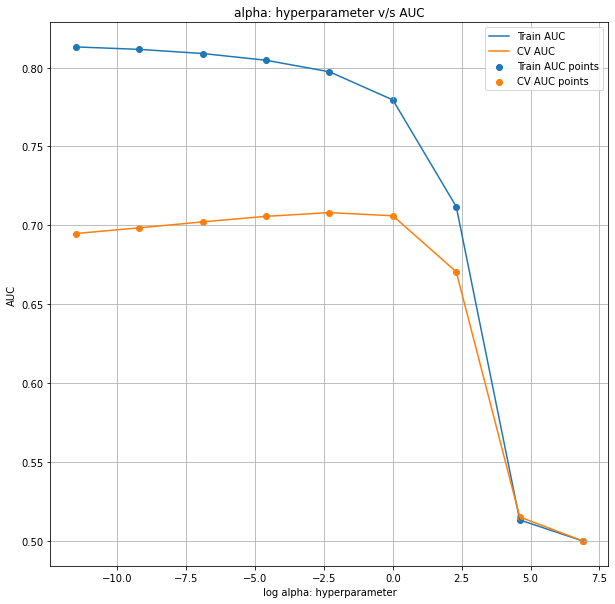

In [70]:
plt.figure(figsize=(10,10))
plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC")
plt.grid()
plt.show()

Using GridsearchCV to find best alpha value for Naive Bayes

In [71]:
from sklearn.model_selection import GridSearchCV

nb = MultinomialNB(class_prior=[0.5,0.5])

parameters = {'alpha':[0.00001, 0.0001,0.001, 0.01, 0.1,0.5,0.8, 1, 10,  100,  1000]}

clf = GridSearchCV(nb, parameters, cv= 10, scoring='roc_auc',return_train_score=True,verbose=2)

clf.fit(x_train_bow, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']
best_parameters = clf.best_params_
best_score = clf.best_score_
best_alpha = clf.best_estimator_.alpha


Fitting 10 folds for each of 11 candidates, totalling 110 fits
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .....................................

100%|██████████| 11/11 [00:00<?, ?it/s]


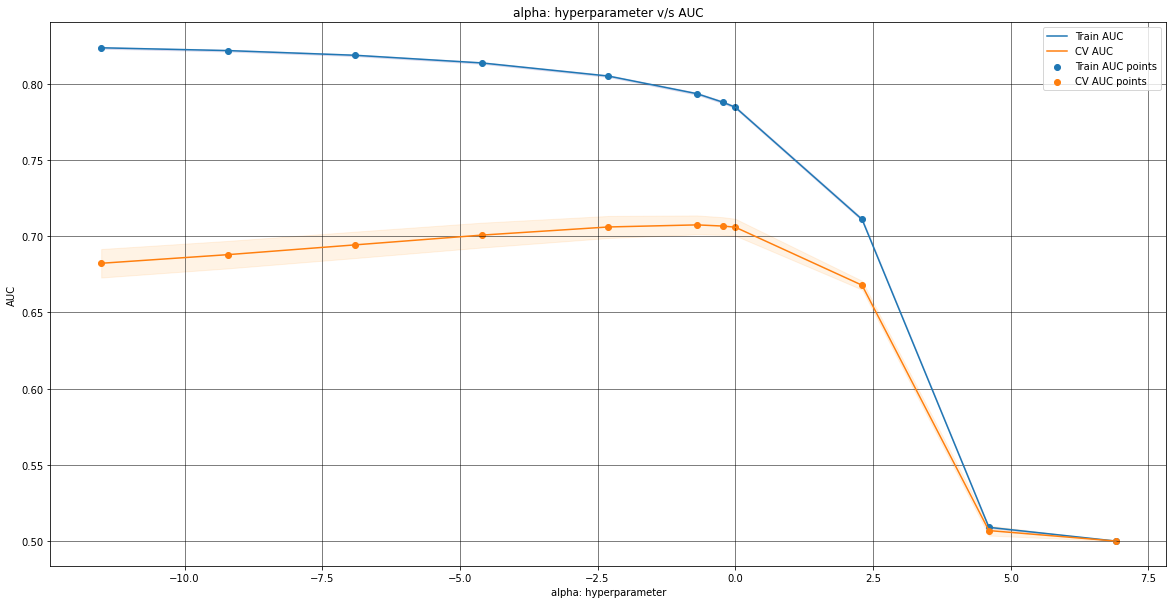

In [72]:
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1,0.5,0.8, 1, 10,  100,  1000]
log_alphas =[]

for a in tqdm(alphas):
    b = math.log(a)
    log_alphas.append(b)

plt.figure(figsize=(20,10))

plt.plot(log_alphas, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_alphas,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.1,color='darkblue')

plt.plot(log_alphas, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_alphas,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.1,color='darkorange')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

In [73]:
best_alpha

0.5

In [74]:
best_parameters

{'alpha': 0.5}

In [75]:
best_score

0.7074570223284367

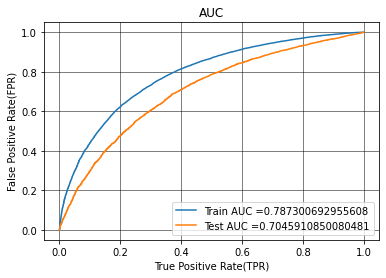

In [76]:
from sklearn.metrics import roc_curve, auc

nb_bow = MultinomialNB(alpha = 0.5,class_prior=[0.5,0.5])

nb_bow.fit(x_train_bow, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(nb_bow, x_train_bow)    
y_test_pred = batch_predict(nb_bow, x_test_bow)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

Confusion Matrix for Naive Bayes

In [77]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.24999999746207385 for threshold 0.028
Train Confusion Matrix


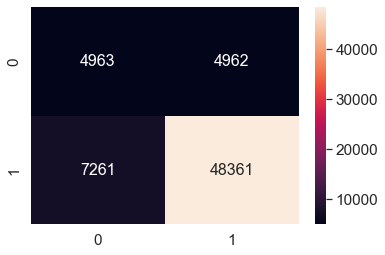

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')
print("Train Confusion Matrix")

the maximum value of tpr*(1-fpr) 0.24999990861624524 for threshold 0.946
test Confusion Matrix


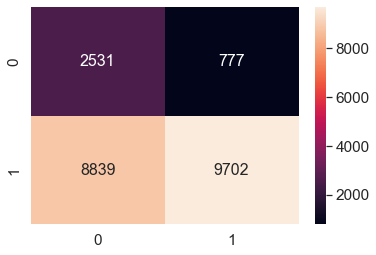

In [79]:
# for test confusion matrix
conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')
print("test Confusion Matrix")

SET 2

In [80]:
train_auc = []
cv_auc = []
log_alphas =[]

alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1,0.5,0.8, 1, 10,  100,  1000]

for i in tqdm(alphas):
    nb = MultinomialNB(alpha = i,class_prior=[0.5,0.5])
    nb.fit(x_train_tfidf, y_train)

    y_train_pred = batch_predict(nb, x_train_tfidf)    
    y_cv_pred = batch_predict(nb, x_cv_tfidf)
    

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

for a in tqdm(alphas):
    b = math.log(a)
    log_alphas.append(b)

100%|██████████| 11/11 [00:00<?, ?it/s]


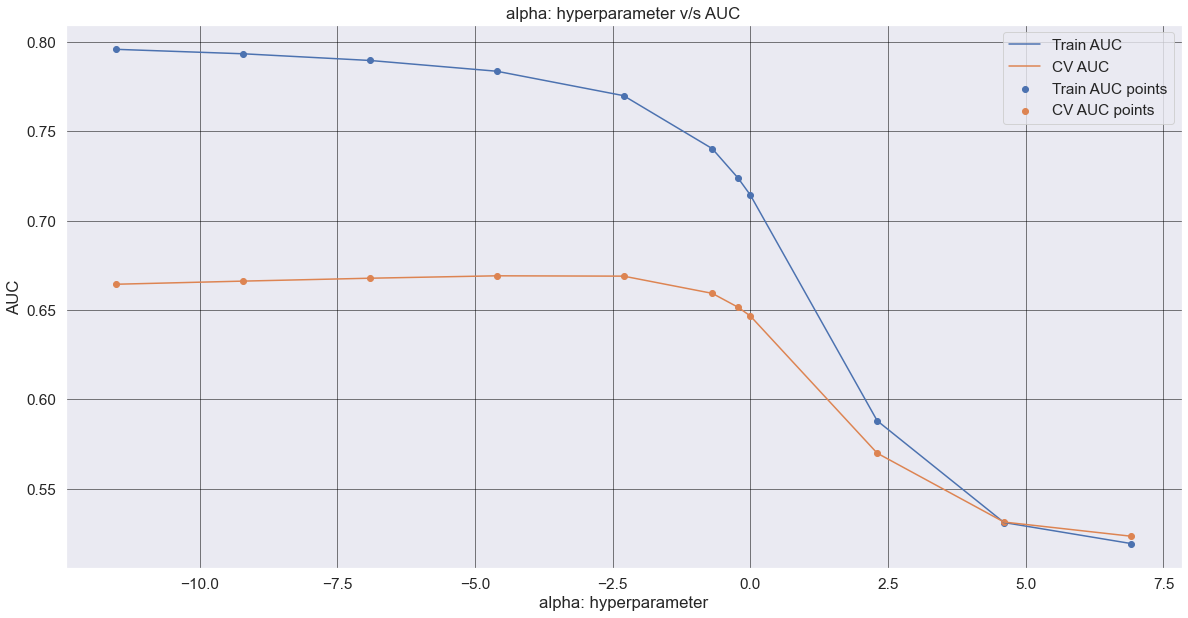

In [81]:
plt.figure(figsize=(20,10))

plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

GridsearchCV to find best alpha value for Naive Bayes

In [82]:
nb = MultinomialNB(class_prior=[0.5,0.5])

parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1,0.25,0.5,0.8, 1,100]}

clf = GridSearchCV(nb, parameters, cv= 10, scoring='roc_auc',return_train_score=True,verbose=2)

clf.fit(x_train_tfidf, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']
best_parameters = clf.best_params_
best_score = clf.best_score_
best_alpha = clf.best_estimator_.alpha

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .....................................

100%|██████████| 10/10 [00:00<?, ?it/s]


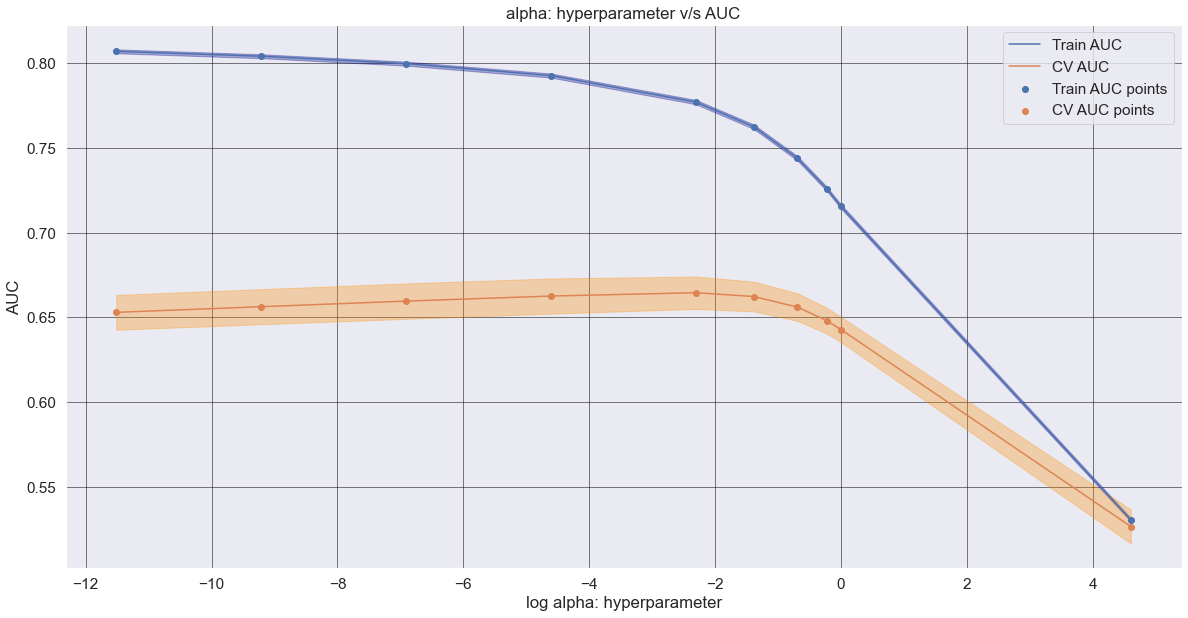

In [83]:
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1,0.25,0.5,0.8, 1,100]
log_alphas =[]

for a in tqdm(alphas):
    b = math.log(a)
    log_alphas.append(b)

plt.figure(figsize=(20,10))

plt.plot(log_alphas, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_alphas,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(log_alphas, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_alphas,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("log alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

Using best alpha value for Naive Bayes

In [84]:
best_parameters

{'alpha': 0.1}

{'alpha': 0.1}


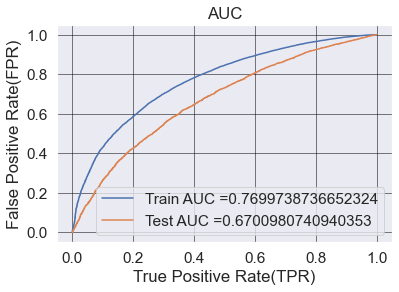

In [93]:
best_alpha2=clf.best_params_
print(best_alpha2)

nb_tfidf = MultinomialNB(alpha = best_alpha,class_prior=[0.5,0.5])

nb_tfidf.fit(x_train_tfidf, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(nb_tfidf, x_train_tfidf)    
y_test_pred = batch_predict(nb_tfidf, x_test_tfidf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

Confusion Matrix for trained Naive Bayes

the maximum value of tpr*(1-fpr) 0.24999999746207385 for threshold 0.355
Train Confusion Matrix:


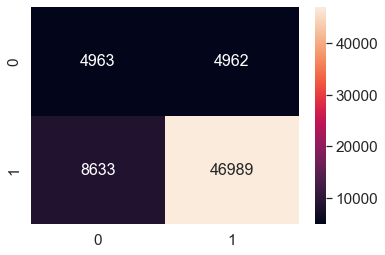

In [86]:
conf_matr_df_train_2 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_2, annot=True,annot_kws={"size": 16}, fmt='g')
print("Train Confusion Matrix:")

Confusion Matrix for test data

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.624
test confusion matrix


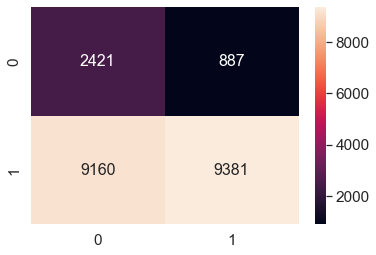

In [87]:
conf_matr_df_test_2 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_2, annot=True,annot_kws={"size": 16}, fmt='g')
print("test confusion matrix")

Selecting top 20 features from SET 1

TOP Positive Features from SET 1

In [88]:


bow_feature_names_set1 = []


for i in vectorizer_sub_cat.get_feature_names_out():
    bow_feature_names_set1.append(i)

for i in vectorizer_sub_sub_cat.get_feature_names_out():
    bow_feature_names_set1.append(i)

for i in vectorizer_states.get_feature_names_out():
    bow_feature_names_set1.append(i)

for i in vectorizer_grade.get_feature_names_out():
    bow_feature_names_set1.append(i)

for i in vectorizer_teacher.get_feature_names_out():
    bow_feature_names_set1.append(i)

for i in vectorizer_essay_bow.get_feature_names_out():
    bow_feature_names_set1.append(i)

for i in vectorizer_titles_bow.get_feature_names_out():
    bow_feature_names_set1.append(i)


len(bow_feature_names_set1)



16296

In [89]:
bow_feature_names_set1.append("price")


bow_feature_names_set1.append("quantity")


bow_feature_names_set1.append("prev_proposed_projects")

bow_feature_names_set1.append("title_word_count")

bow_feature_names_set1.append("essay_word_count")


In [90]:
len(bow_feature_names_set1)

16301

In [102]:
# Top 20 positive features set1
pos_class_prob_sorted = nb_bow.feature_log_prob_[1, :].argsort()[::-1][:16300]
for i in pos_class_prob_sorted[:20]:
    print(bow_feature_names_set1[i])

studies
schoolers
learniture
classwork
learner
helper
ms
maple
napkins
neediest
workbook
reads
used
loved
days
abound
comedians
classes
wound
tectonics


In [103]:
# top 20 negative features set1
neg_class_prob_sorted = nb_bow.feature_log_prob_[0, :].argsort()[::-1][:16300]
for i in neg_class_prob_sorted[0:20]:
    print(bow_feature_names_set1[i])

studies
schoolers
learniture
classwork
learner
helper
ms
napkins
maple
neediest
workbook
comedians
loved
reads
abound
math
skip
days
used
classes


In [105]:
from prettytable import PrettyTable
pt = PrettyTable()
pt.field_names = ["Vectorizer", "Model", "Alpha:Hyper Parameter", " Test AUC"]

pt.add_row(["Bag of Words", "MultinomialNB", "0.5", "0.7873"])
pt.add_row(["TF-IDF", "MultinomialNB", "0.1", "0.6700"])
print(pt)


+--------------+---------------+-----------------------+-----------+
|  Vectorizer  |     Model     | Alpha:Hyper Parameter |  Test AUC |
+--------------+---------------+-----------------------+-----------+
| Bag of Words | MultinomialNB |          0.5          |   0.7873  |
|    TF-IDF    | MultinomialNB |          0.1          |   0.6700  |
+--------------+---------------+-----------------------+-----------+
